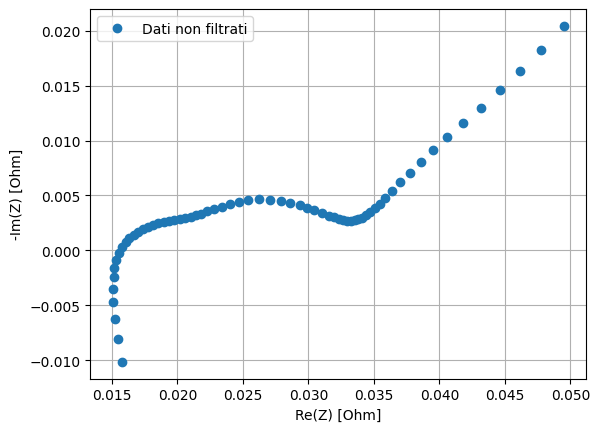

In [ ]:
from impedance import preprocessing
import matplotlib.pyplot as plt

# Importa i dati dal file CSV
frequencies, Z = preprocessing.readCSV('./dati.csv')

# Diagramma di Nyquist
plt.plot(Z.real, -Z.imag, 'o', label='Dati non filtrati')
plt.xlabel('Re(Z) [Ohm]')
plt.ylabel('-Im(Z) [Ohm]')
plt.legend()
plt.grid()
plt.show()

Frequenze: [3.1623e-03 3.9811e-03 5.0119e-03 6.3096e-03 7.9433e-03 1.0000e-02
 1.2589e-02 1.5849e-02 1.9953e-02 2.5119e-02 3.1623e-02 3.9811e-02
 5.0119e-02 6.3096e-02 7.9433e-02 1.0000e-01 1.2589e-01 1.5849e-01
 1.9953e-01 2.5119e-01 3.1623e-01 3.9811e-01 5.0119e-01 6.3096e-01
 7.9433e-01 1.0000e+00 1.2589e+00 1.5849e+00 1.9953e+00 2.5119e+00
 3.1623e+00 3.9811e+00 5.0119e+00 6.3096e+00 7.9433e+00 1.0000e+01
 1.2589e+01 1.5849e+01 1.9953e+01 2.5119e+01 3.1623e+01 3.9811e+01
 5.0119e+01 6.3096e+01 7.9433e+01 1.0000e+02 1.2589e+02 1.5849e+02
 1.9953e+02 2.5119e+02 3.1623e+02 3.9811e+02 5.0119e+02 6.3096e+02
 7.9433e+02 1.0000e+03 1.2589e+03]
Impedenza complessa: [0.0494999 -0.0204387j  0.04776559-0.01828569j 0.04613582-0.01634316j
 0.04459684-0.01458917j 0.0431423 -0.01300096j 0.04181679-0.01157301j
 0.04060674-0.01028213j 0.03951932-0.00911337j 0.03856629-0.00804495j
 0.03773446-0.0070757j  0.03701391-0.00620994j 0.03639992-0.00545066j
 0.03588318-0.00480461j 0.03544781-0.00426302j 0.0

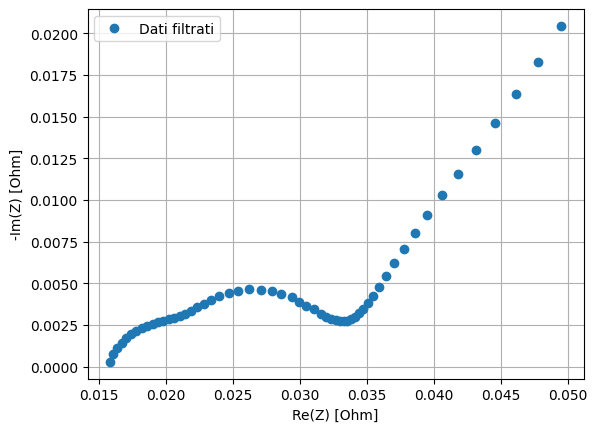

In [ ]:
# Filtra i dati per mantenere solo il primo quadrante
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

# Verifica dei dati
print("Frequenze:", frequencies)
print("Impedenza complessa:", Z)

# Diagramma di Nyquist
plt.plot(Z.real, -Z.imag, 'o',  label='Dati filtrati')
plt.xlabel('Re(Z) [Ohm]')
plt.ylabel('-Im(Z) [Ohm]')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from impedance.models.circuits import CustomCircuit

# Definizione del circuito equivalente
circuit_string = 'R0-p(R1,C1)-p(R2-Wo1,C2)'

# Ipotesi iniziali per i parametri
initial_guess = [0.1, 0.1, 10, 0.1, 0.1, 10, 1]

# Creazione del circuito
circuit = CustomCircuit(circuit_string, initial_guess=initial_guess)

# Visualizzazione della struttura del circuito
print("Struttura del circuito:", circuit.circuit)

# Adattamento del circuito ai dati
circuit.fit(frequencies, Z)
print("Parametri stimati:", circuit.parameters_)

# Impedenza di adattamento
Z_fit = circuit.predict(frequencies)
print("Impedenza di Adattamento:", Z_fit)

Struttura del circuito: R0-p(R1,C1)-p(R2-Wo1,C2)
Parametri stimati: [1.65186238e-02 8.67678041e-03 3.32123257e+00 5.38988304e-03
 6.31130347e-02 2.32695931e+02 2.19521840e-01]
Impedenza di Adattamento: [0.0492693 -0.01905741j 0.04824262-0.01705716j 0.04695499-0.01550467j
 0.04546989-0.01417699j 0.04390684-0.0129203j  0.04239879-0.01167535j
 0.04103924-0.01046124j 0.03985755-0.00932658j 0.03883546-0.00830664j
 0.03793874-0.00740757j 0.03714071-0.00661624j 0.03642729-0.0059168j
 0.03579038-0.00529802j 0.03522246-0.00475243j 0.03471597-0.00427396j
 0.03426398-0.00385733j 0.03386031-0.00349832j 0.03349916-0.00319372j
 0.0331753 -0.00294163j 0.03288361-0.00274126j 0.03261883-0.00259304j
 0.03237541-0.00249881j 0.03214685-0.00246184j 0.03192507-0.00248675j
 0.03169944-0.00257928j 0.03145539-0.00274547j 0.03117298-0.00298987j
 0.03082546-0.00331243j 0.03037979-0.00370281j 0.02980058-0.00413347j
 0.02906064-0.00455396j 0.02815877-0.00489293j 0.02713598-0.00507606j
 0.02607516-0.00505691j 0.025

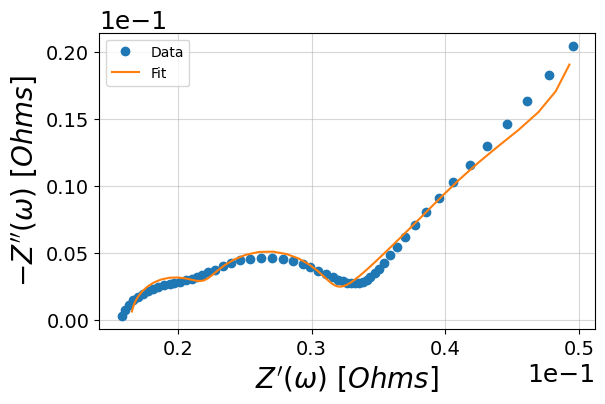

In [ ]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

In [ ]:
import numpy as np

# Calcolo dell'errore
error = Z - Z_fit
print("Errore medio:", np.mean(np.abs(error)))

Errore medio: 0.0005425191451096669


In [ ]:
import pandas as pd

# Salvataggio dei parametri stimati e i dati adattati per future analisi
results = pd.DataFrame({'frequenze': frequencies, 'Z_real': Z.real, 'Z_imag': Z.imag, 'Z_fit_real': Z_fit.real, 'Z_fit_imag': Z_fit.imag})
results.to_csv('risultati_fit.csv', index=False)